# WEEK1 授業課題２：何回折ったら富士山を超えるか問題


### 【問題1】富士山を超える最小の折る回数
厚さが「富士山(3776m)」を超えるのは何回紙を折った時か計算するプログラムを作成してください。

「Pythonを使ってみよう」の問題では「1枚の紙を43回折り曲げた時の厚さを計算するプログラム」を作成し、43回折ることで月に届くことが確認できました。


ここで「何回折ったらある厚さになるのか」という疑問が生まれます。こういったことを計算するプログラムを作成していきましょう。

In [2]:
THICKNESS = 0.00008
MT_FUJI_HIGH = 3776
mind_folds = 0
i = 0

while True:
    i+=1
    folded_thickness = THICKNESS * (2**i)
    
    if folded_thickness >= MT_FUJI_HIGH:
        break

print("Fuji height exceed when folded {} times".format(i))

Fuji height exceed when folded 26 times


## 【問題2】任意の厚さに対応した関数を作成
距離を入力すると、何回折った時に超えるかを出力する関数を作成してください。引数として、折る前の厚さ 
t
0
 も設定できるようにしましょう。


この関数を利用して、「最も近い太陽以外の恒星」に到達するには紙を何回折る必要があるか計算してください。「最も近い太陽以外の恒星」の距離は調査してください。

### 距離・高さを入力すると、何回折った時に超えるかを出力する関数

In [3]:
def times_fold(height, thickness):
    i = 0
    
    while True:
        i+=1
        folded_thickness = thickness * (2**i)
        
        if folded_thickness >= height:
            return i
            

print(times_fold(3776, THICKNESS))

26


### 最も近い太陽以外の恒星

１）プロキシマ・ケンタウリは、4.243光年
https://ja.wikipedia.org/wiki/%E8%BF%91%E3%81%84%E6%81%92%E6%98%9F%E3%81%AE%E4%B8%80%E8%A6%A7


２）光年からメートルへの変換
4.243光年＝4.01419e+16m　（4014190000000000000000)

https://www.google.com/search?q=4.243+light+years+to+meters&oq=4.&aqs=chrome.1.69i57j69i59l3j0i457j0j69i65j69i60.1958j0j7&sourceid=chrome&ie=UTF-8


In [4]:
#プロキシマ・ケンタウリ

print(times_fold(4.01419e+16, THICKNESS))

69


In [5]:
#月の数値も前回と一致するか確認

print(times_fold(384400000, THICKNESS))

43


### 【問題3】必要な紙の長さ

実際のところ身近にある紙は43回はおろか10回も折れません。しかし、大きな紙ほどたくさん折ることができ、トイレットペーパーのような長い紙を一方向に折ることを考えた時の折れる回数を求める公式が存在します。


厚さ t0の紙をn回折るために必要な紙の長さLは以下の公式で求まります。

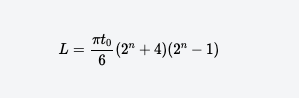

In [6]:
#Function for length of paper

import math

def paper_length(n_fold, thickness):
    Length = math.pi*thickness/6*(2**n_fold + 4)*(2**n_fold - 1)
    return Length


In [11]:
#Length of paper for different places

#Mt FUJI - 3776m
Paper_length_Fuji = paper_length(26, THICKNESS)

#Moon - 384,400 km or 384,400,000m
Paper_length_Moon = paper_length(43, THICKNESS)

#プロキシマ・ケンタウリ - 4014190000000000000000m
Paper_length_Proxy = paper_length(69, THICKNESS)

Distance_dict = {"富士山": Paper_length_Fuji, "月": Paper_length_Moon, "プロキシマ・ケンタウリ": Paper_length_Proxy}

def results_print(Distance_dict):
    for places in Distance_dict:
        print("{}に到達するまで紙を折り続けるには、長さ{}万キロメートルの紙が必要だ".format(places, (Distance_dict[places]/1000/10000)))

results_print(Distance_dict)

富士山に到達するまで紙を折り続けるには、長さ18864.634848724018万キロメートルの紙が必要だ
月に到達するまで紙を折り続けるには、長さ324091944417078.1万キロメートルの紙が必要だ
プロキシマ・ケンタウリに到達するまで紙を折り続けるには、長さ1.4595803601100346e+30万キロメートルの紙が必要だ
